In [64]:
import os 
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings("ignore")

In [65]:
cd "C:\Users\AMIT\Desktop\Amit\Sessions\5-Computer Vision\My Sessions\Session 4\Project1\data\"

C:\Users\AMIT\Desktop\Amit\Sessions\5-Computer Vision\My Sessions\Session 4\Project1\data


In [66]:
X_train = []
y_train = []
clss = os.listdir("train")
for cls in clss:
    cls_path = f"train/{cls}"
    img_names = os.listdir(cls_path)
    for name in img_names:
        img_path = f"{cls_path}/{name}"
        img = plt.imread(img_path)
        X_train.append(img)
        y_train.append(cls)

In [67]:
X_test = []
y_test = []
clss = os.listdir("test")
for cls in clss:
    cls_path = f"test/{cls}"
    img_names = os.listdir(cls_path)
    for name in img_names:
        img_path = f"{cls_path}/{name}"
        img = plt.imread(img_path)
        X_test.append(img)
        y_test.append(cls)

In [68]:
X_train = np.array([cv.resize(img, (64, 64)) for img in X_train])
X_test = np.array([cv.resize(img, (64, 64)) for img in X_test])
y_train = np.array(y_train)
y_test = np.array(y_test)

# Data Split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=42)

# Normalization

In [70]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Encoding

In [71]:
import pandas as pd 
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
y_test = pd.get_dummies(y_test)


# LeNet Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [43]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=6, activation='softmax'),
])

In [44]:
model.compile(loss="categorical_crossentropy",
              metrics = ["accuracy"],
              optimizer="adam")

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=[X_val, y_val])

In [47]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 2s 23ms/step - loss: 0.6756 - accuracy: 0.7607


[0.6755803823471069, 0.7606666684150696]

**pred**

In [53]:
img = X_test[0]
img = np.array([img])
pred = model.predict(img)
clss[np.argmax(pred)]

1/1 [==============================] - 0s 107ms/step


'buildings'

In [54]:
clss[y_test[0]]


KeyboardInterrupt



In [60]:
y = y_test.iloc[0]
y[y==1].index[0]

'buildings'

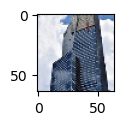

In [76]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0])